In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [70]:
df = pd.read_csv("SRR711361.annovar.hg38_multianno.txt", sep="\t", low_memory=False)
df.head()

,Chr,Start,End,Ref,Alt,Func.refGene,Gene.refGene,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,...,phyloP20way_mammalian_rankscore,phastCons100way_vertebrate,phastCons100way_vertebrate_rankscore,phastCons20way_mammalian,phastCons20way_mammalian_rankscore,SiPhy_29way_logOdds,SiPhy_29way_logOdds_rankscore,Interpro_domain,GTEx_V6_gene,GTEx_V6_tissue
0,chr1,187485,187485,G,A,downstream,MIR6859-1;MIR6859-2;MIR6859-3;MIR6859-4,dist=406,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chr1,633963,633963,C,T,intergenic,MIR6723;OR4F29,dist=1550;dist=51753,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chr1,827252,827252,T,A,ncRNA_exonic,LINC00115,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chr1,872843,872843,G,C,ncRNA_intronic,FAM41C,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chr1,873251,873251,G,A,ncRNA_intronic,FAM41C,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
mutation_types = df.groupby("Func.refGene").size()
mutation_types

Func.refGene
UTR3                      3682
UTR5                      1332
UTR5;UTR3                    6
downstream                 884
exonic                   11801
exonic;splicing              6
intergenic               29110
intronic                 69462
ncRNA_exonic              1488
ncRNA_exonic;splicing        2
ncRNA_intronic            4981
ncRNA_splicing               4
splicing                    42
upstream                  1113
upstream;downstream         71
dtype: int64

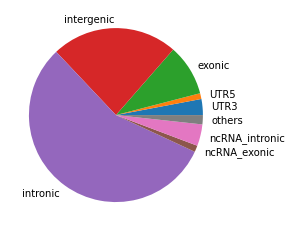

In [37]:
labels = ["UTR3", "UTR5", "exonic", "intergenic", "intronic", "ncRNA_exonic", "ncRNA_intronic"]

mutations_to_plot = mutation_types[labels]
other = sum(mutation_types) - sum(mutations_to_plot)

labels = labels + ["others"]
counts_to_plot = list(mutations_to_plot) + [other]

plt.pie(counts_to_plot, labels=labels)
plt.show()

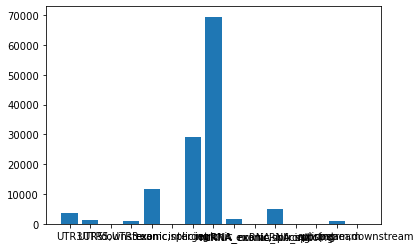

In [24]:
plt.bar(mutation_types.index, list(mutation_types))
plt.show()


In [72]:
## chromosome sizes scatter plots
mutations_per_chr = df.value_counts("Chr")

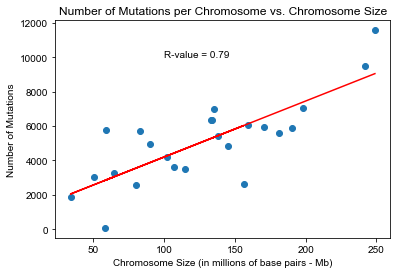

In [73]:
chromosomes = [f"chr{i}" for i in range(1, 23)] + ["chrX"] + ["chrY"]

# Chr 1-22, ChrX, ChrY
chr_sizes = [248.9, 242.2, 198.3, 190.4, 181.0,170.8,159.3,145.1,138.4,133.8,135.1,133.3, 114.4, 107.0, 101.9, 90.,83.3, 80.0, 58.6,64.4,33.9, 50.8,156.1, 57.9]
num_muts = list(mutations_per_chr[chromosomes])

reg = linregress(chr_sizes, num_muts)

plt.scatter(chr_sizes, num_muts)
plt.xlabel("Chromosome Size (in millions of base pairs - Mb)")
plt.ylabel("Number of Mutations")
plt.title("Number of Mutations per Chromosome vs. Chromosome Size")

# add line of best fit
plt.plot(chr_sizes, reg.intercept + reg.slope*np.array(chr_sizes), color="red")
plt.text(100, 10000, f"R-value = {reg.rvalue:.2f}")
plt.show()

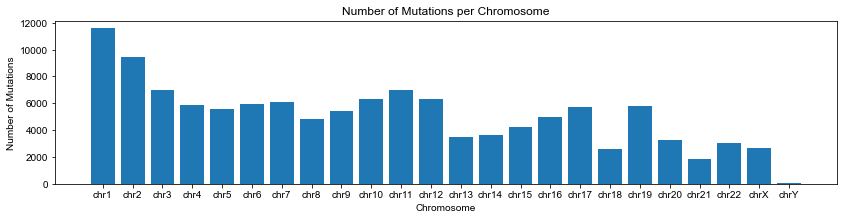

In [74]:
## BAR GRAPH of number of mutations per chromosome

plt.figure(figsize=(14,3))
plt.bar(chromosomes, num_muts)
plt.xlabel("Chromosome")
plt.ylabel("Number of Mutations")
plt.title("Number of Mutations per Chromosome")
plt.show()

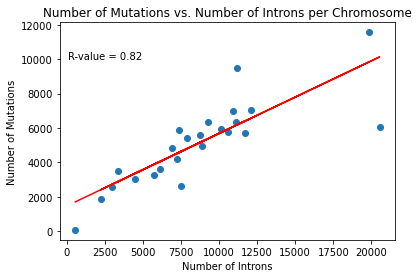

In [100]:
## scatter plot comparing the total number of genes, exons, introns on each chr to num mutations

num_genes = [2514, 1354, 1394, 926, 1186, 1306, 2508, 908, 1033, 1017, 1567, 1299, 426, 854, 843, 1093, 1459, 367, 1609, 775, 309, 671, 1048, 98]
num_exons = [22345, 12506, 13517, 8299, 9946, 11406, 23045, 7823, 8941, 10273, 12459, 12399, 3784, 6837, 8106, 9986, 13179, 3333, 12169, 6492, 2539, 5173, 8568, 660]
num_introns = [19831, 11152, 12123, 7373, 8760, 10100, 20537, 6915, 7908, 9256, 10892, 11100, 3358, 6106, 7263, 8893, 11720, 2966, 10560, 5717, 2230, 4502, 7520, 562]

plt.scatter(num_introns, num_muts)

plt.xlabel("Number of Introns")
plt.ylabel("Number of Mutations")
plt.title("Number of Mutations vs. Number of Introns per Chromosome")

reg = linregress(num_introns, num_muts)
# add line of best fit
plt.plot(num_introns, reg.intercept + reg.slope*np.array(num_introns), color="red")
plt.text(100, 10000, f"R-value = {reg.rvalue:.2f}")
plt.show()

In [1]:
import pandas as pd
df_exonic = pd.read_csv("SRR711361.annovar.hg38_multianno.exonic.txt", sep="\t", low_memory=False)
df_exonic.head()

,Chr,Start,End,Ref,Alt,Func.refGene,Gene.refGene,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,...,phyloP20way_mammalian_rankscore,phastCons100way_vertebrate,phastCons100way_vertebrate_rankscore,phastCons20way_mammalian,phastCons20way_mammalian_rankscore,SiPhy_29way_logOdds,SiPhy_29way_logOdds_rankscore,Interpro_domain,GTEx_V6_gene,GTEx_V6_tissue
0,chr1,827252,827252,T,A,ncRNA_exonic,LINC00115,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chr1,946247,946247,G,A,exonic,NOC2L,NaN,synonymous SNV,NOC2L:NM_015658:exon16:c.C1843T:p.L615L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chr1,952421,952421,A,G,exonic,NOC2L,NaN,synonymous SNV,NOC2L:NM_015658:exon10:c.T1182C:p.T394T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chr1,973858,973858,G,C,exonic,PLEKHN1,NaN,nonsynonymous SNV,"PLEKHN1:NM_001160184:exon13:c.G1355C:p.R452P,P...",...,0.062,0.000,0.063,0.008,0.104,2.650,0.047,.,ENSG00000169962.4|ENSG00000187642.5,Testis|Testis
4,chr1,976536,976536,C,T,exonic,PERM1,NaN,synonymous SNV,"PERM1:NM_001291366:exon3:c.G2238A:p.R746R,PERM...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
!pip install pycircos

In [2]:
import geneview as gv

In [20]:
df_vcf_exon = pd.read_csv("SRR711361.flt.hq.nohead.vcf", sep="\t", low_memory=False, header=None)
df_vcf_exon.head()

chromosomes = [f"chr{i}" for i in range(1, 23)] + ["chrX"] + ["chrY"]
df_vcf_exon = df_vcf_exon[df_vcf_exon[0].isin(chromosomes)]

df_vcf_exon[0] = df_vcf_exon[0].apply(lambda x: x[3:])
df_vcf_exon[5] = df_vcf_exon[5].apply(lambda x: 10 ** (-x))

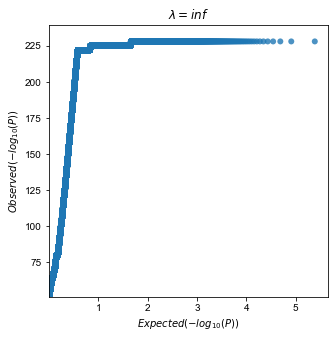

In [22]:
ax = gv.qqplot(data=df_vcf_exon[5])
plt.show()

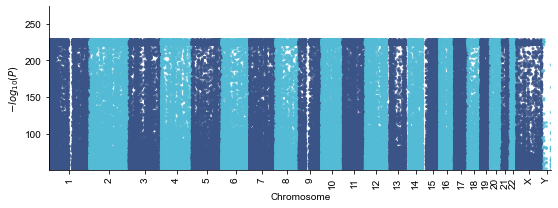

In [24]:
ax = gv.manhattanplot(data=df_vcf_exon, chrom=0, pos=1, pv=5,
                      xticklabel_kws={"rotation":"vertical"})
plt.show()

In [41]:
## LETS LOOK FOR INTERESTING VARIANTS

df_exonic_nonsyn = pd.read_csv("SRR711361.annovar.hg38_multianno.exonic.nonsynonymous.txt", sep="\t", low_memory=False)
df_test = df_exonic_nonsyn[df_exonic_nonsyn["CLINSIG"].notna()]
df_test.columns

Index(['Chr', 'Start', 'End', 'Ref', 'Alt', 'Func.refGene', 'Gene.refGene',
       'GeneDetail.refGene', 'ExonicFunc.refGene', 'AAChange.refGene',
       'avsnp150', 'CLINSIG', 'CLNDBN', 'CLNACC', 'CLNDSDB', 'CLNDSDBID',
       'SIFT_score', 'SIFT_converted_rankscore', 'SIFT_pred',
       'Polyphen2_HDIV_score', 'Polyphen2_HDIV_rankscore',
       'Polyphen2_HDIV_pred', 'Polyphen2_HVAR_score',
       'Polyphen2_HVAR_rankscore', 'Polyphen2_HVAR_pred', 'LRT_score',
       'LRT_converted_rankscore', 'LRT_pred', 'MutationTaster_score',
       'MutationTaster_converted_rankscore', 'MutationTaster_pred',
       'MutationAssessor_score', 'MutationAssessor_score_rankscore',
       'MutationAssessor_pred', 'FATHMM_score', 'FATHMM_converted_rankscore',
       'FATHMM_pred', 'PROVEAN_score', 'PROVEAN_converted_rankscore',
       'PROVEAN_pred', 'VEST3_score', 'VEST3_rankscore', 'MetaSVM_score',
       'MetaSVM_rankscore', 'MetaSVM_pred', 'MetaLR_score', 'MetaLR_rankscore',
       'MetaLR_pred', 'M

In [54]:
df_tst2 = df_test[["Chr", "Start", "Ref", "Alt", "Gene.refGene", "ExonicFunc.refGene", 'GeneDetail.refGene', 'AAChange.refGene', "avsnp150","CLINSIG", 'CLNDBN', 'CLNACC', 'CLNDSDB', 'CLNDSDBID']]

In [69]:
df_path = df_tst2[df_tst2["CLINSIG"].str.contains("Pathogenic")]
df_path

,Chr,Start,Ref,Alt,Gene.refGene,ExonicFunc.refGene,GeneDetail.refGene,AAChange.refGene,avsnp150,CLINSIG,CLNDBN,CLNACC,CLNDSDB,CLNDSDBID
246,chr1,100206504,T,C,DBT,nonsynonymous SNV,NaN,DBT:NM_001918:exon9:c.A1150G:p.S384G,rs12021720,"Pathogenic,other","Intermediate_maple_syrup_urine_disease_type_2,...","RCV000012727.23,RCV000116865.5","MedGen,MedGen","CN069615,CN169374"
344,chr1,158654738,G,T,SPTA1,nonsynonymous SNV,NaN,SPTA1:NM_003126:exon21:c.C2909A:p.A970D,rs35948326,Pathogenic|other|Likely benign,"Spherocytosis,_type_3,_autosomal_recessive|not...",RCV000013699.24|RCV000251633.1|RCV000315888.1,MedGen|MedGen|MedGen,C4016379|CN169374|CN239472
816,chr3,10289773,G,T,GHRL,nonsynonymous SNV,NaN,"GHRL:NM_001134944:exon2:c.C178A:p.L60M,GHRL:NM...",rs696217,Pathogenic|other,"Obesity,_age_at_onset_of|Metabolic_syndrome,_s...",RCV000005365.2|RCV000005366.2,.,.
872,chr3,45772602,G,A,SLC6A20,nonsynonymous SNV,NaN,SLC6A20:NM_020208:exon5:c.C596T:p.T199M,rs17279437,other|Pathogenic,"Hyperglycinuria|Iminoglycinuria,_digenic",RCV000005117.3|RCV000005118.2,MedGen:OMIM|MedGen,C0543541:138500|C3148959
1307,chr5,74685445,T,C,HEXB,nonsynonymous SNV,NaN,HEXB:NM_000521:exon1:c.T185C:p.L62S,rs820878,"Pathogenic,Benign","Sandhoff_disease,_infantile_type,not_specified","RCV000004086.3,RCV000153357.2","MedGen,MedGen","C1849322,CN169374"
1444,chr5,177093242,G,A,FGFR4,nonsynonymous SNV,NaN,"FGFR4:NM_002011:exon9:c.G1162A:p.G388R,FGFR4:N...",rs351855,Pathogenic,Cancer_progression_and_tumor_cell_motility,RCV000017723.28,MedGen,C4016099
1909,chr7,150999023,T,G,NOS3,nonsynonymous SNV,NaN,"NOS3:NM_001160109:exon7:c.T894G:p.D298E,NOS3:N...",rs1799983,other|other|other|Pathogenic|other|other|Benign,"Coronary_artery_spasm_1,_susceptibility_to|Alz...",RCV000015053.3|RCV000015054.3|RCV000015055.3|R...,MedGen,CN169374
2284,chr9,133436862,C,G,ADAMTS13,nonsynonymous SNV,NaN,"ADAMTS13:NM_139025:exon12:c.C1342G:p.Q448E,ADA...",rs2301612,Pathogenic|Benign|Benign,Upshaw-Schulman_syndrome|not_specified|Upshaw-...,RCV000006169.4|RCV000241706.1|RCV000275338.1,MedGen:OMIM:Orphanet:SNOMED_CT|MedGen|MedGen:O...,C1268935:274150:ORPHA93583:373420004|CN169374|...
2423,chr10,68885620,A,C,STOX1,nonsynonymous SNV,NaN,"STOX1:NM_001130161:exon3:c.A1824C:p.E608D,STOX...",rs10509305,Pathogenic,Preeclampsia/eclampsia_4,RCV000001790.2,MedGen:OMIM,C1836255:609404
3184,chr12,120737875,C,T,ACADS,nonsynonymous SNV,NaN,ACADS:NM_000017:exon5:c.C511T:p.R171W,rs1800556,other|Pathogenic,Deficiency_of_butyryl-CoA_dehydrogenase|not_pr...,RCV000004034.5|RCV000185683.2,MedGen:OMIM:Orphanet:SNOMED_CT|MedGen,C0342783:201470:ORPHA26792:124166007|CN221809


In [59]:
rsID = ["rs35948326", "rs696217", "rs1800556"]

In [64]:
df_path[df_path["avsnp150"].isin(rsID)]

,Chr,Start,Ref,Alt,Gene.refGene,ExonicFunc.refGene,GeneDetail.refGene,AAChange.refGene,avsnp150,CLINSIG,CLNDBN,CLNACC,CLNDSDB,CLNDSDBID
344,chr1,158654738,G,T,SPTA1,nonsynonymous SNV,NaN,SPTA1:NM_003126:exon21:c.C2909A:p.A970D,rs35948326,Pathogenic|other|Likely benign,"Spherocytosis,_type_3,_autosomal_recessive|not...",RCV000013699.24|RCV000251633.1|RCV000315888.1,MedGen|MedGen|MedGen,C4016379|CN169374|CN239472
816,chr3,10289773,G,T,GHRL,nonsynonymous SNV,NaN,"GHRL:NM_001134944:exon2:c.C178A:p.L60M,GHRL:NM...",rs696217,Pathogenic|other,"Obesity,_age_at_onset_of|Metabolic_syndrome,_s...",RCV000005365.2|RCV000005366.2,.,.
3184,chr12,120737875,C,T,ACADS,nonsynonymous SNV,NaN,ACADS:NM_000017:exon5:c.C511T:p.R171W,rs1800556,other|Pathogenic,Deficiency_of_butyryl-CoA_dehydrogenase|not_pr...,RCV000004034.5|RCV000185683.2,MedGen:OMIM:Orphanet:SNOMED_CT|MedGen,C0342783:201470:ORPHA26792:124166007|CN221809


In [67]:
list(df_path["CLNDBN"])

['Intermediate_maple_syrup_urine_disease_type_2,not_specified',
 'Spherocytosis,_type_3,_autosomal_recessive|not_specified|Spherocytosis,_Recessive',
 'Obesity,_age_at_onset_of|Metabolic_syndrome,_susceptibility_to',
 'Hyperglycinuria|Iminoglycinuria,_digenic',
 'Sandhoff_disease,_infantile_type,not_specified',
 'Cancer_progression_and_tumor_cell_motility',
 'Coronary_artery_spasm_1,_susceptibility_to|Alzheimer_disease,_late-onset,_susceptibility_to|Hypertension,_pregnancy-induced,_susceptibility_to|Hypertension_resistant_to_conventional_therapy|Ischemic_heart_disease,_susceptibility_to|Ischemic_stroke,_susceptibility_to|not_specified',
 'Upshaw-Schulman_syndrome|not_specified|Upshaw-Schulman_syndrome',
 'Preeclampsia/eclampsia_4',
 'Deficiency_of_butyryl-CoA_dehydrogenase|not_provided',
 'Maturity-onset_diabetes_of_the_young,_type_3|not_specified,Maturity-onset_diabetes_of_the_young,_type_3|not_specified',
 '4-Alpha-hydroxyphenylpyruvate_hydroxylase_deficiency',
 'Atopy,_resistance_to